<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Naive%20bayes(Salary%20data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
Path = r"/content/SalaryData_Train.csv"
Path1 = r"/content/SalaryData_Test.csv"

In [4]:
train_data = pd.read_csv(Path)
test_data = pd.read_csv(Path1)

In [5]:
data = pd.concat([train_data, test_data])

In [6]:
print(data.head())


   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

In [7]:
print(data.shape)

(45221, 14)


In [8]:
print(data.dtypes)

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object


In [9]:
print(data.isnull().sum())

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


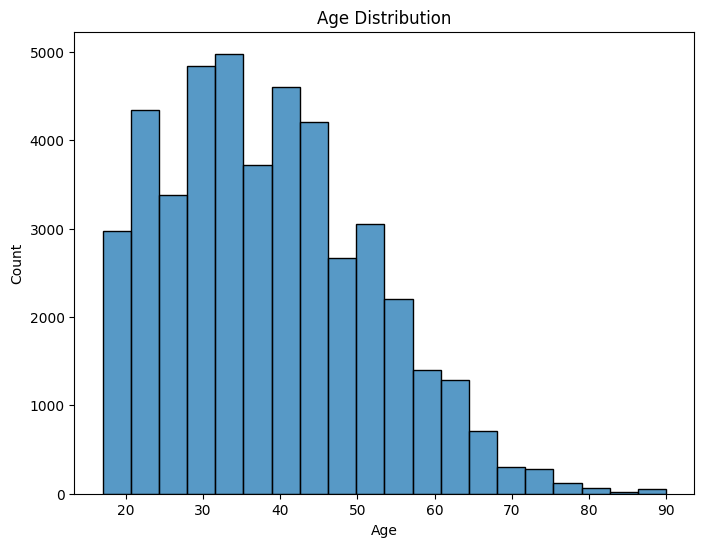

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

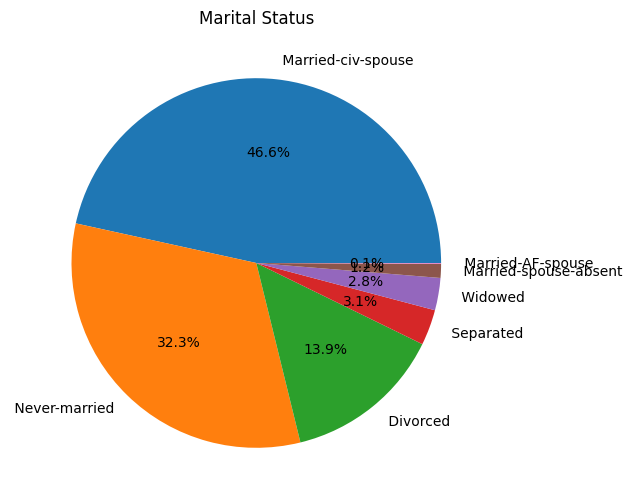

In [28]:
maritalstatus_counts = data['maritalstatus'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(maritalstatus_counts, labels=maritalstatus_counts.index, autopct='%1.1f%%')
plt.title('Marital Status')
plt.show()

In [31]:
data['capital_change'] = data['capitalgain'] - data['capitalloss']

In [32]:
age_bins = [0, 25, 35, 45, 55, 65, 100]
age_labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

In [33]:
hour_bins = [0, 20, 30, 40, 50, 168]
hour_labels = ['<20', '20-30', '30-40', '40-50', '50+']
data['work_hours'] = pd.cut(data['hoursperweek'], bins=hour_bins, labels=hour_labels)

In [45]:
label_encoder = LabelEncoder()
data['education_encoded'] = label_encoder.fit_transform(data['education'])

In [46]:
train_data = data[:train_data.shape[0]]
test_data = data[train_data.shape[0]:]

In [47]:
selected_cols = ['age_group', 'workclass', 'education_encoded', 'maritalstatus', 'occupation', 'relationship',
                 'race', 'sex', 'capital_change', 'work_hours', 'Salary']
train_data_selected = train_data[selected_cols]
test_data_selected = test_data[selected_cols]

In [48]:
X_train = train_data_selected.drop('Salary', axis=1)
y_train = train_data_selected['Salary']
X_test = test_data_selected.drop('Salary', axis=1)
y_test = test_data_selected['Salary']

In [51]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train.select_dtypes(include=['object'])))
X_test_encoded = pd.DataFrame(encoder.transform(X_test.select_dtypes(include=['object'])))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
X_train_encoded = pd.concat([X_train_encoded, X_train.select_dtypes(include=['number'])], axis=1)
X_test_encoded = pd.concat([X_test_encoded, X_test.select_dtypes(include=['number'])], axis=1)

In [53]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_encoded, y_train)

GaussianNB()

In [54]:
y_pred = nb_classifier.predict(X_test_encoded)

In [55]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11048   312]
 [ 2735   965]]
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88     11360
        >50K       0.76      0.26      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.78      0.62      0.63     15060
weighted avg       0.79      0.80      0.76     15060



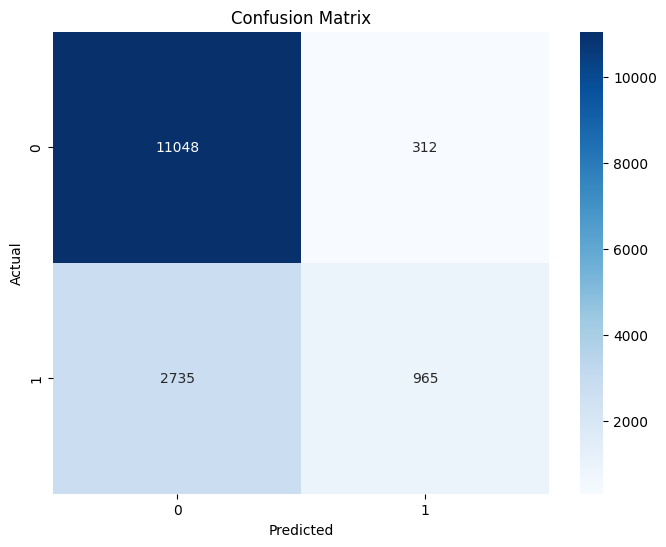

In [56]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()